In [1]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing as ps
from difflib import SequenceMatcher
import csv
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
#Organizo el archivo .json para descargar todo
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
#Se descarga el nuevo set de datos
!kaggle datasets download -d georgesaavedra/covid19-dataset

 55% 5.00M/9.09M [00:00<00:00, 49.8MB/s]
100% 9.09M/9.09M [00:00<00:00, 79.1MB/s]


In [5]:
#Se descomprime
!unzip /content/covid19-dataset.zip

Archive:  /content/covid19-dataset.zip
  inflating: owid-covid-data.csv     


# Exploracion de datos

In [6]:
d = pd.read_csv("owid-covid-data.csv")
d

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166321,ZWE,Africa,Zimbabwe,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166322,ZWE,Africa,Zimbabwe,2022-03-02,237503.0,632.0,416.286,5396.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166323,ZWE,Africa,Zimbabwe,2022-03-03,237503.0,0.0,362.286,5396.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166324,ZWE,Africa,Zimbabwe,2022-03-04,238739.0,1236.0,467.429,5397.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


Tamano datos

In [7]:
print (d.shape)

(166326, 67)


Valores faltantes en columnas

In [8]:
k = d.isna().sum()
k[k!=0]

continent                                    9956
total_cases                                  3033
new_cases                                    3193
new_cases_smoothed                           5176
total_deaths                                20875
                                            ...  
human_development_index                     30073
excess_mortality_cumulative_absolute       160630
excess_mortality_cumulative                160630
excess_mortality                           160630
excess_mortality_cumulative_per_million    160630
Length: 64, dtype: int64

Tipo de datos

In [11]:
d.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [12]:
for c in d.columns:
    print ("%20s"%c, d[c].dtype)

            iso_code object
           continent object
            location object
                date object
         total_cases float64
           new_cases float64
  new_cases_smoothed float64
        total_deaths float64
          new_deaths float64
 new_deaths_smoothed float64
total_cases_per_million float64
new_cases_per_million float64
new_cases_smoothed_per_million float64
total_deaths_per_million float64
new_deaths_per_million float64
new_deaths_smoothed_per_million float64
   reproduction_rate float64
        icu_patients float64
icu_patients_per_million float64
       hosp_patients float64
hosp_patients_per_million float64
weekly_icu_admissions float64
weekly_icu_admissions_per_million float64
weekly_hosp_admissions float64
weekly_hosp_admissions_per_million float64
           new_tests float64
         total_tests float64
total_tests_per_thousand float64
new_tests_per_thousand float64
  new_tests_smoothed float64
new_tests_smoothed_per_thousand float64
       positive_ra

### Inspeccion columnas numericas

In [13]:
d._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
total_cases,163293.0,2.536044e+06,1.543441e+07,1.000000,2001.000000,26117.000000,298702.000000,4.451295e+08
new_cases,163133.0,1.157084e+04,8.442598e+04,0.000000,1.000000,79.000000,1063.000000,4.206334e+06
new_cases_smoothed,161150.0,1.156560e+04,8.257830e+04,0.000000,7.000000,107.143000,1146.000000,3.444237e+06
total_deaths,145451.0,5.766407e+04,3.021145e+05,1.000000,79.000000,783.000000,7307.000000,5.995245e+06
new_deaths,145487.0,1.711373e+02,8.322513e+02,0.000000,0.000000,2.000000,20.000000,1.802000e+04
...,...,...,...,...,...,...,...,...
human_development_index,136253.0,7.255868e-01,1.499642e-01,0.394000,0.602000,0.743000,0.845000,9.570000e-01
excess_mortality_cumulative_absolute,5696.0,3.761302e+04,1.043065e+05,-37726.100000,-75.150000,3424.600000,24784.625000,1.080748e+06
excess_mortality_cumulative,5696.0,9.404336e+00,1.643917e+01,-28.450000,-0.722500,6.065000,14.520000,1.110100e+02
excess_mortality,5696.0,1.596708e+01,3.009283e+01,-95.920000,-0.752500,7.195000,22.997500,3.749300e+02


Correlaciones

<ipython-input-14-0710436d47fb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = d.corr()


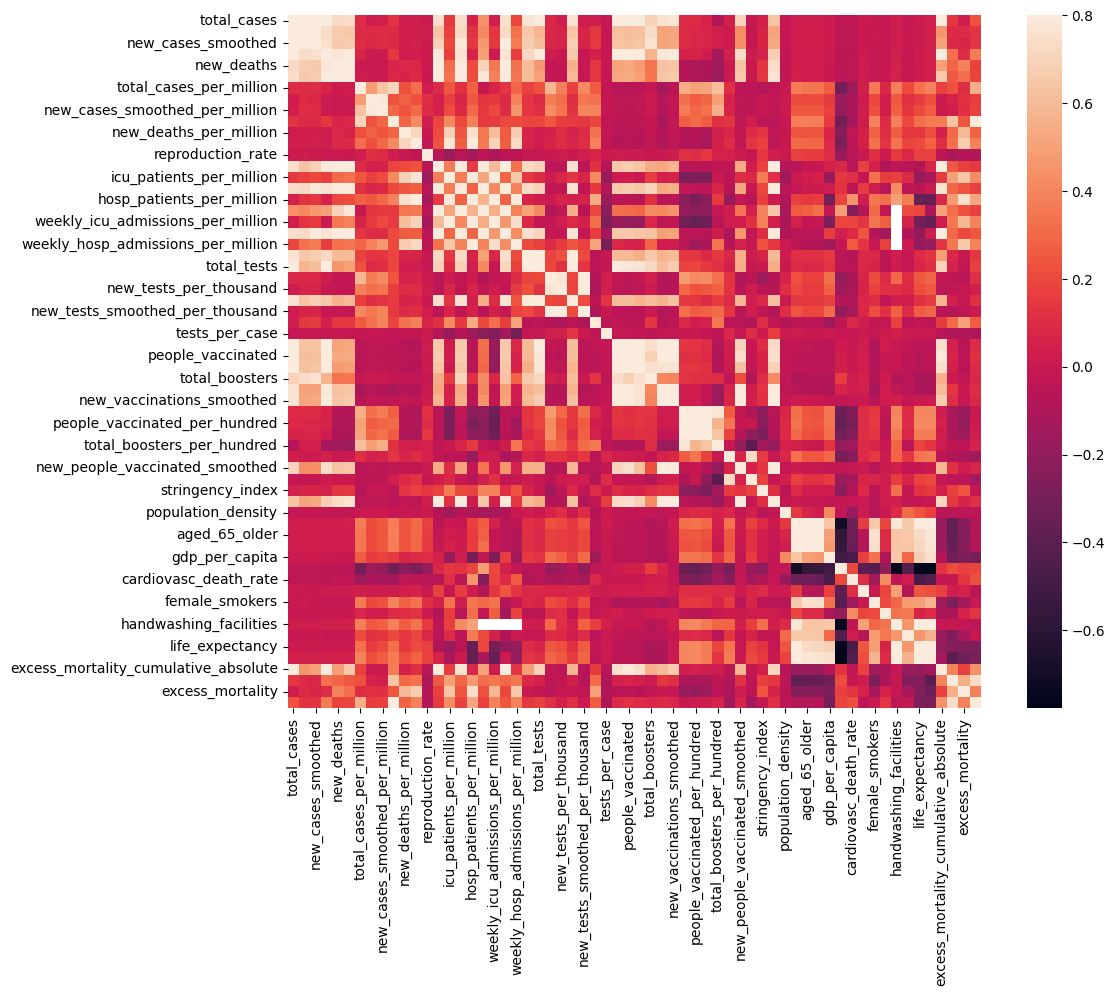

In [14]:
#correlation matrix
corrmat = d.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

### Inspeccion variables categoricas

In [15]:
#Columnas categoricas
ccols = [i for i in d.columns if not i in d._get_numeric_data()]
print (ccols)

['iso_code', 'continent', 'location', 'date', 'tests_units']


In [16]:
for c in ccols:
    print ("%10s"%c, np.unique(d[c].dropna()))
    print('--------------------------')

  iso_code ['ABW' 'AFG' 'AGO' 'AIA' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ATG' 'AUS' 'AUT'
 'AZE' 'BDI' 'BEL' 'BEN' 'BES' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR'
 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHL'
 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COK' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CUW'
 'CYM' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ERI'
 'ESP' 'EST' 'ETH' 'FIN' 'FJI' 'FLK' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO'
 'GGY' 'GHA' 'GIB' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUY'
 'HKG' 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL'
 'ISR' 'ITA' 'JAM' 'JEY' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA'
 'KOR' 'KWT' 'LAO' 'LBN' 'LBR' 'LBY' 'LCA' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX'
 'LVA' 'MAC' 'MAR' 'MCO' 'MDA' 'MDG' 'MDV' 'MEX' 'MHL' 'MKD' 'MLI' 'MLT'
 'MMR' 'MNE' 'MNG' 'MOZ' 'MRT' 'MSR' 'MUS' 'MWI' 'MYS' 'NAM' 'NCL' 'NER'
 'NGA' 'NIC' 'NIU' 'NLD' 'NOR' 'NPL' 'NRU' 'NZL' 'OMN' 'OWID_AFR'
 'OWID_ASI' 'OWID_CYN' 'OWID_EUN' 'OWID_EUR' 'O

In [17]:
c="continent"
d[c].value_counts()

Africa           39417
Europe           37088
Asia             36200
North America    24931
South America     9517
Oceania           9217
Name: continent, dtype: int64

In [18]:
c="location"
d[c].value_counts()

Argentina       795
Mexico          795
Thailand        792
Taiwan          780
China           774
               ... 
Turkmenistan    183
Tuvalu          179
Niue            157
Tokelau         114
Pitcairn         85
Name: location, Length: 238, dtype: int64

In [19]:
c="tests_units"
d[c].value_counts()

tests performed    62531
people tested      14127
samples tested      8935
units unclear        793
Name: tests_units, dtype: int64

In [20]:
c='iso_code'
d[c].value_counts()

ARG    795
MEX    795
THA    792
TWN    780
CHN    774
      ... 
TKM    183
TUV    179
NIU    157
TKL    114
PCN     85
Name: iso_code, Length: 238, dtype: int64